In [154]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from coniii import *
from math import exp
import numpy as np
import sys
import pickle as pkl

import context_wrangling as cw
import load_data as ld

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
winds = [1]
cat = "full"

In [146]:
wordcount_window, word_dict, window_dict = ld.load_counts("full")

In [157]:
context_samples = cw.sample_contexts_wind(cat, winds[0], frame=20, samples=1000000)
context_counts = cw.context_to_count(context_samples, top_n=50)[:,:-1]
ising_sample = np.where(context_counts > 0, 1, -1)
ising_sample

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [155]:
with open(f"objects/{cat}/{cat}_context_samples.pkl", "wb") as f:
    pkl.dump(context_samples, f)

with open(f"objects/{cat}/{cat}_context_counts.pkl", "wb") as f:
    pkl.dump(context_counts, f)

In [161]:
np.set_printoptions(suppress=True)
context_counts.sum(axis=0)

array([ 40009.,  80895., 115647., 135782.,  85650., 108688.,  81782.,
        99283.,  80094.,  89623.,  90770.,  54868.,  93795.,  50656.,
        40604.,  42587.,  47916.,  98020.,  85842.,  69255.,  29433.,
        56532.,  51125.,  30335., 161437.,   8441.,  78651.,  27574.,
        42049.,  68510.,  37663.,  25591.,  19145.,      4.,  49713.,
        23395.,  36433.,  14854.,  27699.,  67453.,  12541.,  68320.,
        40777.,  34869., 113553.,  22117.,  34177.,  27638.,    568.,
        10096.])

In [162]:
word_dict[33]

'program'

In [125]:
ising_sample.mean(axis=0)

array([-0.89204   , -0.93022667, -0.84493333, -0.87825333, -0.80825333,
       -0.91318667, -0.91354667, -0.90584   , -0.90233333, -0.90418667,
       -0.91368   , -0.8912    , -0.94769333, -0.85584   , -0.88804   ,
       -0.87689333, -0.91553333, -0.9404    , -0.88722667, -0.92564   ,
       -0.88829333, -0.90409333, -0.91477333, -0.88366667, -0.97965333,
       -0.91836   , -0.93306667, -0.87437333, -0.9324    , -0.94582667,
       -0.9098    , -0.91652   , -0.89968   , -0.92737333, -0.94148   ,
       -0.91338667, -0.91962667, -0.91733333, -0.96542667, -0.92602667,
       -0.88889333, -0.97794667, -0.93468   , -0.95225333, -0.99325333,
       -0.92254667, -0.94986667, -0.90109333, -0.92842667, -0.91853333])

Text(0.5, 1.0, 'Ising means')

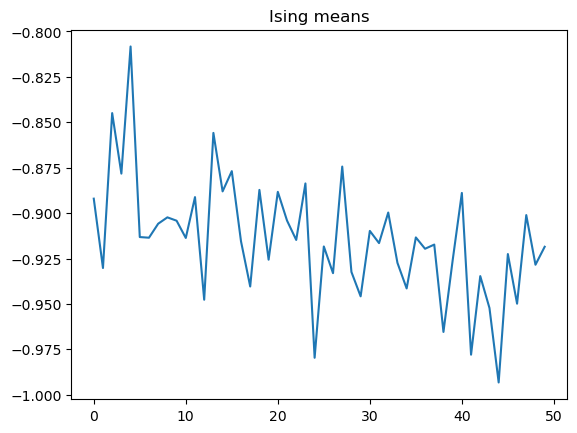

In [126]:
plt.plot(range(50), ising_sample.mean(axis=0))
plt.title("Ising means")

In [127]:
solver = Pseudo(ising_sample)
output = solver.solve(reg_scale=0)

/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")


testing


/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1777: RuntimeWarning: overflow encountered in exp
  dloglikelihood = ( -(1/(1+np.exp(2*E)) * np.exp(2*E))[:,None] * 2*obs[r] ).sum(0)
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: overflow encountered in exp
  return -loglikelihood, dloglikelihood
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: invalid value encountered in multiply
  return -loglikelihood, dloglikelihood
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1777: RuntimeWarning: overflow encountered in exp
  dloglikelihood = ( -(1/(1+np.exp(2*E)) * np.exp(2*E))[:,None] * 2*obs[r] ).sum(0)
/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/solvers.py:1778: RuntimeWarning: overflow encountered in exp
  return -loglikelihood, dloglikelihood
/h

In [128]:
model = solver.model
model.setup_sampler()
model.generate_sample(100*solver.n, 1000*solver.n, multipliers=solver.multipliers)
obs = solver.calc_observables(model.sample).mean(0)

spin_means = obs[:solver.n]
spin_pair_corr = obs[solver.n:]

/home/victorvikram/anaconda3/envs/invising/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")


In [129]:
model.sample.mean(0)

array([-0.884, -0.91 , -0.842, -0.864, -0.77 , -0.914, -0.92 , -0.902,
       -0.892, -0.894, -0.918, -0.89 , -0.95 , -0.842, -0.896, -0.878,
       -0.922, -0.94 , -0.894, -0.932, -0.918, -0.92 , -0.896, -0.88 ,
       -0.972, -0.892, -0.93 , -0.876, -0.934, -0.948, -0.916, -0.906,
       -0.906, -0.9  , -0.938, -0.91 , -0.914, -0.916, -0.954, -0.932,
       -0.872, -0.982, -0.916, -0.946, -0.998, -0.914, -0.952, -0.918,
       -0.926, -0.93 ])

In [130]:
spin_means

array([-0.884, -0.91 , -0.842, -0.864, -0.77 , -0.914, -0.92 , -0.902,
       -0.892, -0.894, -0.918, -0.89 , -0.95 , -0.842, -0.896, -0.878,
       -0.922, -0.94 , -0.894, -0.932, -0.918, -0.92 , -0.896, -0.88 ,
       -0.972, -0.892, -0.93 , -0.876, -0.934, -0.948, -0.916, -0.906,
       -0.906, -0.9  , -0.938, -0.91 , -0.914, -0.916, -0.954, -0.932,
       -0.872, -0.982, -0.916, -0.946, -0.998, -0.914, -0.952, -0.918,
       -0.926, -0.93 ])

Text(0.5, 1.0, 'Solver biases')

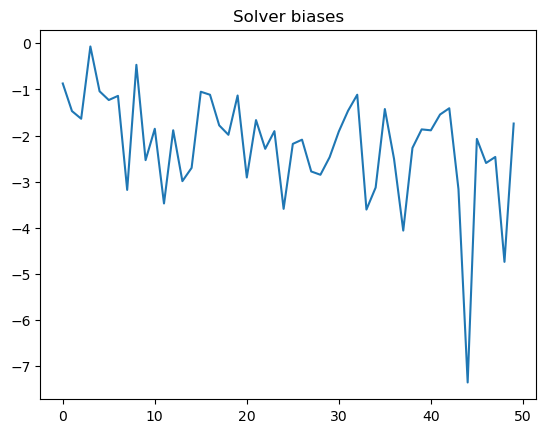

In [131]:
plt.plot(range(solver.n), solver.multipliers[:solver.n])
plt.title("Solver biases")

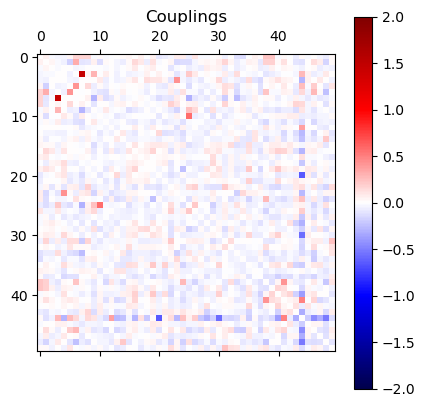

In [132]:
from scipy.spatial.distance import squareform 

square_couplings = squareform(solver.multipliers[solver.n:])

plt.matshow(square_couplings, cmap="seismic", vmin=-2, vmax=2)
plt.title("Couplings")
plt.colorbar()

(-1.0, -0.75)

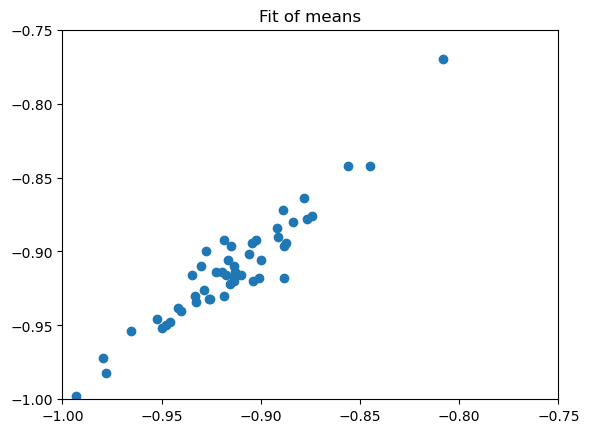

In [133]:
plt.scatter(ising_sample.mean(axis=0), spin_means)
plt.title("Fit of means")
plt.xlim((-1, -0.75))
plt.ylim((-1, -0.75))

In [14]:
pairs = two_tuple_arr.coords.transpose()

In [17]:
repeated_pairs = np.repeat(pairs, two_tuple_arr.data, axis=0)

In [19]:
repeated_pairs.shape[0]

130296

In [20]:
two_tuple_arr.data.sum()

130296

In [11]:
two_tuple_arrs = {}
three_tuple_arrs = {}

for wind in winds:
    with open(f"objects/{cat}/{cat}_2tuple_arr_{wind}.pkl", "rb") as f:
        two_tuple_arr = pkl.load(f)

    with open(f"objects/{cat}/{cat}_3tuple_arr_{wind}.pkl", "rb") as f:
        three_tuple_arr = pkl.load(f)
    
    two_tuple_arrs[wind] = two_tuple_arr
    three_tuple_arrs[wind] = three_tuple_arr